# Homework 8: Nearest Neighbors Regression 🏘

Name: Mahoto Sasaki

Student ID: 467695

Collaborators:


## Instructions

In this homework, we will be exploring a more realistic application of similarity-based leanring. It might be helpful to review **Lab 8 (Feature Transformation and Similarity-based Prediction with k-NN)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Using `sklearn` for $k$-Nearest Neighbors

In Lab 8, we got familiar with $k$-nearest neighbors ($k$-NN) by implementing the algorithm. If you are still not comfortable with how the algorithm works, then we suggest that you review your work from the lab. We will proceed here under this assumption.

In this section, we will explore how to use the [$k$-NN _regression_ model supplied by `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor). You can find the [$k$-NN _classification_ model here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

### Loading Some Data

We'll need to start by getting some data — what is data science without data? For this assignment, we will be revisiting another old friend: the Boston Housing dataset.

In [46]:
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

While we're here, let's review what this dataset is about.

In [47]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Problem 1.1

**Write-up!** How many examples are in the dataset? How many features does it have? What are the features? What is the target variable that we would like to estimate? What kind of machine learning problem is this?

### Scaling Data

In the lab, we also looked at data scaling and transformations. Here we'll demonstrate how to use `sklearn` to help us with this. Let's call this **approach 1**. 

In [48]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# new train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# compute the mean and standard deviation on a training set 
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the transforamtion to both the trainnig and the test set
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

An alternative and much quicker way of scaling the the data is the following (let's call this **approach 2**): 

In [49]:
X_scaled = preprocessing.scale(X)

### Problem 1.2

**Write-up** What types of scaling does `StandardScaler()` and `scale` perform? `Hint` Use the [`?` operator](https://ipython.readthedocs.io/en/stable/interactive/python-ipython-diff.html#accessing-help). Which of the two proceedures is a more appropriate preprocessing step for supervised machine learning and _why_? 

In [50]:
#preprocessing.scale?
#preprocessing.StandardScaler?

### Looking Into the Model

Now that we have some data to play with, let's try building a $k$-NN regression model. The model provided by `sklearn` shares the a similar interface as the other models that we have looked at previously (esp. $k$-means).

In [51]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

### Problem 1.3

Use the [`?` operator](https://ipython.readthedocs.io/en/stable/interactive/python-ipython-diff.html#accessing-help) provided by IPython to explore `model` and it's interface.

**Try this!** In the cell below, complete the following:
1. create and fit a new `KNeighborsRegressor` model with 5 neighbors
2. make some predictions using the model on your testing data
3. evaluate the performance of the model by computing $R^2$ and storing it in `r_squared`

In [52]:
import numpy as np

# your code here
new_model = KNeighborsRegressor(n_neighbors=5)
new_model.fit(X_train, y_train)

r_squared = new_model.score(X = X_test, y = y_test)

assert np.isclose(r_squared, 0.71538, rtol=1e-4), 'You should see this R^2 value'

r_squared

0.7153853569196222

In [53]:
### Problem 1.4

**Write-up!** What was the $R^2$ value for your $k$-NN model using five neighbors? What does $R^2$ tell you about a model? What does this score tell you about your model?

Type:        KNeighborsRegressor
String form:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')
File:        /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neighbors/_regression.py
Docstring:  
Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets
associated of the nearest neighbors in the training set.

Read more in the :ref:`User Guide <regression>`.

.. versionadded:: 0.9

Parameters
----------
n_neighbors : int, optional (default = 5)
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : str or callable
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in th

With that, let's move on to some more interesting things.

## 2. Choosing $k$ with Cross Validation

In order to test whether the `kNN` algorithm (or any other machine learning algorithm) performs how we want it to and accurately makes predictions, we must compare the known label of all datapoints to the predicted label of those same datapoints. So far we have seen this in the forms of model evaluation and validation in model selection. 

In model evaluation we partitioned our original dataset into two parts: a training set and a testing set. As we have seen earlier in the course, the testing set is a smaller percentage of the total dataset than the training set.

Later on, in model selection, we explored why it was important to have yet another set of data partitioned out for usage as a validation set, which we could use to experiment with a model's hyperparameters. The validation set allowed use to "evaluate" our model's performance with various settings of it's parameters while maintaining a completely untouched dataset for out final evaluation.

We can extend this idea once again to improve our estimates of model performance through **cross validation**.

### `kFolds` method

One version of cross validation partitions the dataset into `k` partitions, or folds. We use `k-1` folds to train the model, then the one fold we left out to test the model. We iterate this process `k` times, leaving out a different fold each time, so that we have an accuracy score for each one of the `k` different partitions. We can then take the average of all of these accuracies to calculate a more wholistic accuracy representation of the algorithm. In the example below, `k = 5`; there are 5 partitions. Each partition is used once as a test partition while the other 4 are used for training purposes. The idea for $k$-fold cross validation is based on the realization that we can get a better picture of our model's performance by feeding it many combinations of our data.

![](utility/pics/kFold.png)

We use the `KFold` function to partition our dataset into `k` partitions. While the `KFold` function does not split the dataset itself, it provides the indices by which to split the dataset.

Below, we split an arbitrary array of length 10 into 5 folds: 

In [54]:
from sklearn.model_selection import KFold

dummy = np.arange(10) # example data

# initialize KFolds
kf = KFold(n_splits=5, shuffle=True)

# iterating over k different splits of dummy
for fold, (train_idx, test_idx) in enumerate(kf.split(dummy)):
    print(f'For iteration {fold}: Train indices: {train_idx}. Test indices: {test_idx}')

For iteration 0: Train indices: [0 1 3 4 5 6 8 9]. Test indices: [2 7]
For iteration 1: Train indices: [0 1 2 5 6 7 8 9]. Test indices: [3 4]
For iteration 2: Train indices: [0 1 2 3 4 5 7 9]. Test indices: [6 8]
For iteration 3: Train indices: [0 1 2 3 4 6 7 8]. Test indices: [5 9]
For iteration 4: Train indices: [2 3 4 5 6 7 8 9]. Test indices: [0 1]


Notice how each testing datapoint appears once, ensuring that all datapoints have had a chance to be be tested against the model trained with the rest of the dataset. 

### Problem 2.1

Now, let's try using the `KFold` operation on the full Boston Housing dataset, building and fitting new $k$-NN models with each fold, and averaging the scores of each model.

**Try this!** Complete the `knn_kfolds` function so that it performs `n_folds`-fold cross validation of $k$-NN models on `X` using `n_neighbors` and returns the average $R^2$ value of the models in `avg_score`.

* Make sure to scale your training and test sets appropriately (à la the [Scaling Data](#Scaling-Data) section).
* Ensure that you make and fit a new model for each fold.
* Also, please make sure that you set `random_state` appropriately in your initialization of `KFold`.

`Hint` Refer to the previous example of how to use `KFold` and your work in [Problem 1.2](#Problem-1.2).

In [55]:
def knn_kfolds(X, y, n_folds, n_neighbors, random_state=None):
    '''Computes'''

    # your code here
    totalScore = 0;
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):        
        X_train1, X_test1 = X[train_idx], X[test_idx]
        y_train1, y_test1 = y[train_idx], y[test_idx]
        
        scaler = preprocessing.StandardScaler().fit(X_train1)
        X_train1 = scaler.transform(X_train1)  
        X_test1 = scaler.transform(X_test1) 
        
        model = KNeighborsRegressor(n_neighbors)
        model.fit(X_train1, y_train1)
        totalScore+= model.score(X = X_test1, y = y_test1)
    avg_score = totalScore / n_folds
    
    assert np.isscalar(avg_score), 'The average score should be a single number'
    assert 0 <= avg_score and avg_score <= 1, 'The average score should be between 0 and 1'
    
    return avg_score

### Choosing $k$

We can use cross validation as a substitute for the model selection algorithm that we've used in the past.

### Problem 2.2

In this problem, we will use cross validation and our `knn_kfolds` function to help us pick the right $k$ to use for our Boston Housing predictions.

**Try this!** In the following cell, use 10-fold cross validation to evaluate the performance of $k$-NN on $X_{\text{scaled}}$ and $y$ from the Boston Housing dataset and provide a plot of the cross validation average $R^2$ values for $k$ values from 1 to 20 (inclusive). Use a random state of 12 for your analysis. Ensure that your plot has the appropriate components.

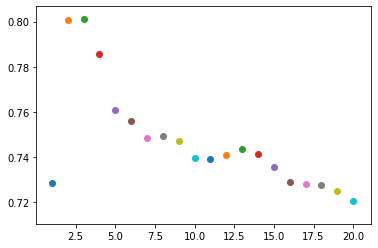

In [56]:
# your code here
import matplotlib.pyplot as plt

for i in range(20):
    avg_score = knn_kfolds(X_scaled, y, 10, i+1, 12)
    plt.scatter(i+1, avg_score)

### Problem 2.3

**Write-up!** Based on your plot from [Problem 2.2](#Problem-2.2), which $k$ value would you pick for your final model? Explain why.

## 3. Model Selection with Cross Validation

As mentioned before, we can use cross validation to get a more thorough evaluation of model performance. This means that we can use if for model selection by substituting it for the validation set process that we have used in the past.

In this section, we will compare our $k$-NN regression model with a linear regression model that we used back in Lab 4 when we last looked at the Boston Housing dataset.

### Problem 3.1

**Try this!** In the following cell, report the cross validation score (average $R^2$) of a $k$-NN model with the $k$ you selected in [Problem 2.3](#Problem-2.3) on `X_scaled`. Use a random state of 4.

In [59]:
# your code here
knn_kfolds(X_scaled, y, n_folds=10, n_neighbors=3, random_state=4)

0.8080891806722349

### Problem 3.2

Now let's do 10-fold cross validation on a linear regression model on `X` without scaling.

**Write-up** Why should shouldn't we use scaling here? What will happen if we do?

**Try this!** Perform 10-fold cross validation for linear regression on `X` and report the average $R^2$ value across all of the folds. Make sure to create and fit new models for each fold of the process. Use a random state of 5. `Hint` Refer to your work in [Problem 2.1](#Problem-2.1).

In [58]:
# your code here
from sklearn.linear_model import LinearRegression
kf = KFold(n_splits=10, shuffle=True, random_state=5)
totalScore = 0
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):        
    X_train1, X_test1 = X[train_idx], X[test_idx]
    y_train1, y_test1 = y[train_idx], y[test_idx]
    model = LinearRegression()
    model.fit(X_train1, y_train1)
    print(model.score(X = X_train1, y = y_train1))
    totalScore+= model.score(X = X_train1, y = y_train1)
avg_score = totalScore / 10
print()
print(avg_score)

0.7421121752607969
0.738006563361719
0.7608511046800274
0.7409344708934305
0.7357498294949991
0.742610609360596
0.7413763147424426
0.7450119040998939
0.7469579457511123
0.7277865054815109

0.7421397423126528


### Problem 3.3

**Write-up!** What were the $R^2$ values for each of the models? Which model would you prefer? Why?

### Problem 3.4

**Write-up!** Describe your next steps as a data scientist now that you have decided which model to use.